In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Выриант 13. Задание
# Сгенерировать N облаков (классов) с M точками (объектами) в каждом. 
# Построить классификатор используя scikit-learn который достигнет точности R лежащей в интервале (R1, R2).

N=5
M=810
R_1=0.696
R_2=0.701

In [3]:
# Генерируем набор точек

cloud = np.transpose([np.random.normal(0.0, 1.0, M), np.random.normal(0.0, 1.0, M)])
cloud

array([[-0.2881599 , -1.95432497],
       [-1.54688816, -0.54354616],
       [ 0.75151757, -0.77183555],
       ...,
       [-0.58534843, -0.55288478],
       [ 0.27296476, -0.72234869],
       [ 2.88722308,  0.91504292]])

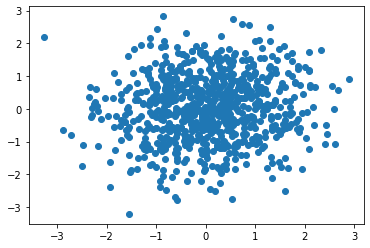

In [4]:
plt.scatter(cloud[:,0], cloud[:,1])


In [5]:
# Параметры
print(cloud.mean())
print(cloud.std())
print(cloud.mean(axis=0))

0.026292821229664087
0.9991861994291387
[0.0438242  0.00876144]


In [6]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import preprocessing


In [7]:
# пять облаков
accur = 0
r=1
l=(2*np.pi)/N


while (R_1 > accur) or (accur > R_2) :
  
    cloud1 = cloud + np.array([r*np.cos(0),r*np.sin(0)])
    cloud2 = cloud + np.array([r*np.cos(l),r*np.sin(l)])
    cloud3 = cloud + np.array([r*np.cos(l*2),r*np.sin(l*2)])
    cloud4 = cloud + np.array([r*np.cos(l*3),r*np.sin(l*3)])
    cloud5 = cloud + np.array([r*np.cos(l*4),r*np.sin(l*4)])

    
    clouds = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5])
    
    annot1 = np.ones(clouds.shape[0])
    annot1[M:]=2
    annot1[M*2:]=3
    annot1[M*3:]=4
    annot1[M*4:]=5
    
    data, labels = shuffle(clouds, annot1)
    
    
    
    test_size = int(len(data)*0.5)
    Xtrain = data[:test_size]
    Ytrain = labels[:test_size]
    
    
    
    Xtest = data[test_size:]
    Ytest = labels[test_size:]
    
    clf=LogisticRegression()
    
    clf.fit(Xtrain, Ytrain)
    predictions = clf.predict(Xtest)
        
    accur = accuracy_score(Ytest, predictions)
    r = r + 0.01

 
    

In [8]:
clouds.shape

(4050, 2)

# Отчет

## 1. Параметры генерации данных

In [9]:
print(f"параметры генерации данных 1-го облака точек: М(Х) = {round(r*np.cos(l), 2)}, М(Y) = {round(r*np.sin(l),2)}")

print(f"параметры генерации данных 2-го облака точек: М(Х) = {round(r*np.cos(l*2), 2)}, М(Y) = {round(r*np.sin(l*2),2)}")

print(f"параметры генерации данных 3-го облака точек: М(Х) = {round(r*np.cos(l*3), 2)}, М(Y) = {round(r*np.sin(l*3),2)}")

print(f"параметры генерации данных 4-го облака точек: М(Х) = {round(r*np.cos(l*4), 2)}, М(Y) = {round(r*np.sin(l*4),2)}")

print(f"параметры генерации данных 5-го облака точек: М(Х) = {round(r*np.cos(l*5), 2)}, М(Y) = {round(r*np.sin(l*5),2)}")






параметры генерации данных 1-го облака точек: М(Х) = 0.52, М(Y) = 1.6
параметры генерации данных 2-го облака точек: М(Х) = -1.36, М(Y) = 0.99
параметры генерации данных 3-го облака точек: М(Х) = -1.36, М(Y) = -0.99
параметры генерации данных 4-го облака точек: М(Х) = 0.52, М(Y) = -1.6
параметры генерации данных 5-го облака точек: М(Х) = 1.68, М(Y) = -0.0


In [10]:
# Среднее и СКО
#print(f"среднее для 1-го облака точек: М(Х) = {round(cloud1[:,0].mean(), 2)}, М(Y) = {round(cloud1[:,1].mean(), 2)}, б(X) = {round(cloud1[:,0].std(), 2)}, б(Y) = {round(cloud1[:,1].std(), 2)}")
#print(f"среднее для 2-го облака точек: М(Х) = {round(cloud2[:,0].mean(), 2)}, М(Y) = {round(cloud2[:,1].mean(), 2)}, б(X) = {round(cloud2[:,0].std(), 2)}, б(Y) = {round(cloud2[:,1].std(), 2)}")
#print(f"среднее для 2-го облака точек: М(Х) = {round(cloud3[:,0].mean(), 2)}, М(Y) = {round(cloud3[:,1].mean(), 2)}, б(X) = {round(cloud3[:,0].std(), 2)}, б(Y) = {round(cloud3[:,1].std(), 2)}")
#print(f"среднее для 2-го облака точек: М(Х) = {round(cloud4[:,0].mean(), 2)}, М(Y) = {round(cloud4[:,1].mean(), 2)}, б(X) = {round(cloud4[:,0].std(), 2)}, б(Y) = {round(cloud4[:,1].std(), 2)}")
#print(f"среднее для 2-го облака точек: М(Х) = {round(cloud5[:,0].mean(), 2)}, М(Y) = {round(cloud5[:,1].mean(), 2)}, б(X) = {round(cloud5[:,0].std(), 2)}, б(Y) = {round(cloud5[:,1].std(), 2)}")




## 2. Графическое представление расположения набора данных

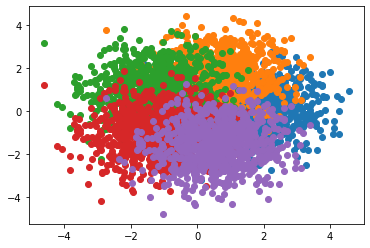

In [11]:
plt.scatter(cloud1[:,0], cloud1[:,1])
plt.scatter(cloud2[:,0], cloud2[:,1])
plt.scatter(cloud3[:,0], cloud3[:,1])
plt.scatter(cloud4[:,0], cloud4[:,1])
plt.scatter(cloud5[:,0], cloud5[:,1])


## 3. Матрица ошибок

In [12]:
confusion_matrix(Ytest, predictions)

array([[281,  52,   3,   6,  45],
       [ 55, 278,  51,   7,   5],
       [  6,  66, 275,  56,   4],
       [  7,   4,  58, 288,  61],
       [ 67,   5,   5,  52, 288]], dtype=int64)

## 4. Точность классификации

In [13]:
print(accur)

0.6962962962962963
